# JupyterLab Getting Started Guide

## Installation (MacOS)
These installation instructions are for MacOS with homebrew installed. It uses a homebrew (brew) and pip (python3, pip3) environment. I have chosen to install with python 3, however python 2.7 installation is also possible.

Additional instructions and alternate installation methods (ie. conda) can be found here:
- [jupyter notebook installation instructions](https://jupyter.readthedocs.io/en/latest/install.html)
- [jupyterlab installation](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html)

### To install with homebrew/pip:
Update brew/check for issues

```
brew update
brew doctor
```
Install python3 and pip3:
```
brew install python3
pip3 install --upgrade pip
```
Install jupyter notebook (dependency)
```
pip3 install jupyter
```
Install jupyterLab
```
pip3 install jupyterlab
```
Run jupyterLab
```
jupyter lab
```
This will open jupyterLab in your web browser. Alternatively you can run jupyterLab by typing the URL [http://localhost:8888/lab](http://localhost:8888/lab) into any browser.

### Installing some useful extensions (kernels)
[Overview of extensions](https://jupyterlab.readthedocs.io/en/stable/user/extensions.html)

[Extensions on github](https://github.com/topics/jupyterlab-extension)

Extensions require node to be installed/upgraded:
```
brew upgrade node
```

#### Latex
This extension allows jupyterLab to create pdfs from .tex documents. 

First Install the server extension:
```
pip3 install jupyterlab_latex
```
Install the lab extension (enables UI for latex preview)
```
jupyter labextension install @jupyterlab/latex
```
To use just right click on a .tex document in jupyterLab and select "Show Latex Preview"

#### Script of Scripts (SOS)
SOS enables multiple languages (matlab, python, etc) to be used in a single jupyter notebook. 

[running SOS](https://vatlab.github.io/sos-docs/running.html#content)

To install for jupyter notebook:
```
pip3 install sos
pip3 install sos-notebook
python3 -m sos_notebook.install
```
To install jupyterLab extension (note that this is currently only supported for jupyterLab 1.0.0 alpha so it may be best to wait for the 1.0.0 releast to install):
```
jupyter labextension install transient-display-data
jupyter labextension install jupyterlab-sos
```

[SOS with matlab video](https://www.youtube.com/watch?v=t9ohJZnuanc&feature=youtu.be)

#### Octave
Octave is a good alternative to matlab. Octave can execute most .m files
```
pip install octave_kernel
```
To add support for SOS (same for both matlab and octave):
```
pip install sos-matlab

```

#### Matlab
*Note:* Matlab integration seems to have issues. I have not been able to successfully run a Jupyter matlab kernel...

First install [matlab python engine](https://www.mathworks.com/help/matlab/matlab_external/install-the-matlab-engine-for-python.html)
```
cd /Applications/MATLAB_R2019a.app//extern/engines/python
python3 setup.py install
```
install python matlab kernel
```
pip3 install matlab_kernel
```
Alternatively, install imatlab
```
pip3 install imatlab
python3 -mimatlab install
pip3 install sos-matlab
```

#### C++ (Xeus-cling)
Cling is a interpreter for C++ code. 

[Cling Jupyter instructions](https://github.com/root-project/cling/tree/master/tools/Jupyter):

Using cling Jupyter interpreter:
```
brew install cling
git clone https://github.com/root-project/cling.git
mkdir /usr/local/share/cling
cp -r cling/tools/Jupyter /usr/local/share/cling/
cd /usr/local/share/cling/Jupyter/kernel
pip install -e .
jupyter-kernelspec install cling-cpp17
jupyter-kernelspec install cling-cpp11
```

Alternatively try and install [xeus cling](https://github.com/QuantStack/xeus-cling):
```
git clone https://github.com/QuantStack/xeus-cling.git
cd /path/to/xeus-cling/source
mkdir build
cd build
cmake -DCMAKE_INSTALL_PREFIX=/usr/local/ ../
make install
```
Install [xeus](https://github.com/QuantStack/xeus) and follow build instructions in readme.md. On MacOS with openSSL, may have to configure cmake with (point to brew installed openssl and libcrypto):
```
cmake -DCMAKE_INSTALL_PREFIX=/usr/local/ -DOPENSSL_ROOT_DIR=/usr/local/opt/openssl -DOPENSSL_INCLUDE=/usr/local/opt/openssl/include -DOPENSSL_CRYPTO_LIBRARY=/usr/local/opt/openssl/lib/libcrypto.dylib -DOPENSSL_SSL_LIBRARY=/usr/local/opt/openssl/lib/libssl.dylib ../
```
For some of the dependencies to install (ie cppzmq), it might be best to run
```
brew install zeromq
brew uninstall --ignore-dependencies zeromq
```
and then install [libzmq](https://github.com/zeromq/libzmq) from source and then install [cppzmq](https://github.com/zeromq/cppzmq) from source.

For libzmq:
```
git clone https://github.com/zeromq/libzmq.git
cd libzmq
./autogen.sh
./configure
./make
./make install
```


#### Other commands
Check installed jupyter kernels:
```
jupyter kernelspec list
```
Remove installed jupyter kernel:
```
jupyter kernelspec remove my-kernel
```
List installed lab extensions:
```
jupyter labextension list
```
Uninstall lab extension:
```
jupyter labextension uninstall my-extension
```

#### Some useful links:
- [jupyter latex](https://github.com/jupyterlab/jupyterlab-latex)
- [jupyter matlab](https://github.com/Calysto/matlab_kernel)
- [jupyter SOS](https://vatlab.github.io/sos-docs/)
- [jupyterLab SOS](https://github.com/vatlab/jupyterlab-sos)
- [jupyterLab extensions on github](https://github.com/topics/jupyterlab-extension)
- [jupyter unnoficial extensions](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/index.html)  
- [some jupyter lab useful extensions](https://medium.com/@subpath/jupyter-lab-extensions-for-data-scientist-e0d97d529fc1)

## Sphinx Introduction

[getting started](https://docs.readthedocs.io/en/stable/intro/getting-started-with-sphinx.html)

[jupyter and sphinx](https://nbsphinx.readthedocs.io/en/0.4.2/)

[working efficiently with jupyter lab](https://florianwilhelm.info/2018/11/working_efficiently_with_jupyter_lab/)

[nbsphinx with jupyter](https://nbsphinx.readthedocs.io/en/0.4.2/usage.html)

## Building Jupyter journals

First install nbsphinx
```
pip install nbsphinx
```
Then rung the following to create `conf.py` and `index.rst` files
```
python3 -m sphinx.cmd.quickstart
```

Modify the `conf.py` file to include (at least) the following

```
extensions = [
    'nbsphinx',
    'sphinx.ext.mathjax',
]

master_doc = 'index'

exclude_patterns = ['_build', '**.ipynb_checkpoints']
```

Make sure that your `.ipynb` files are listed in the `index.rst` toctree. For example, if the file `Introduction.ipynb` contains your jupyter notebook, the toctree should be:

```
.. toctree::
   :maxdepth: 2
   :caption: Contents:
   
   Introduction
```
Also note that the indent must be 3 spaces.


Now build using sphinx:
```
python3 -m sphinx . _build -j4
make html
```

An alternate approach to creating `index.rst` and `conf.py` in a separate docs folder:
```
mkdir docs
cd docs
sphinx-quickstart
```

## Hosting documentation on readthedocs.org

1. Create an account on [readthedocs.org](https://readthedocs.org)
1. Setup a git repo for your documentation
1. Either link your github/bitbucket account or configure a specific repository manually
1. Setup the proper branch in the Admin -> Advanced Settings tab
1. Add a requirements.txt file to your repo. For example `requirements.txt` could be
```
$ cat requirements.txt
        ipykernel
        numpy
        matplotlib
        pandas
        nbsphinx
```
1. In Admin->Advanced Settings, specify the path to the Requirements file in your git repo
1. Build it!



## Embedded Latex in Markdown

### Inline Code

You can embed latex equations inline: $c = \sqrt{a^2 + b^2}$ using `$` 
```
$c = \sqrt{a^2 + b^2}$
```

and displayed:
$$c = \sqrt{a^2 + b^2}$$ 
using `$$`
```
$$c = \sqrt{a^2 + b^2}$$
```

Or within a block
```
\begin{align}
    c &= \sqrt{a^2 + b^2}
\end{align}
```
\begin{align}
    c &= \sqrt{a^2 + b^2}
\end{align}

### Maxwells Equations

```
\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}
{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\ 
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}
```

\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\   
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

### The Cauchy-Schwarz Inequality

```
\begin{equation*}
\left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right)
\end{equation*}
```

\begin{equation*}
\left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right)
\end{equation*}

## Python Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

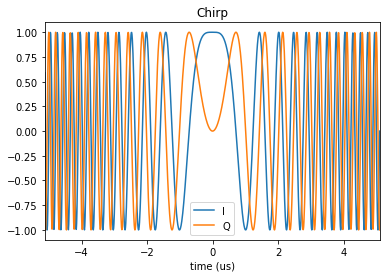

In [2]:
fs = 100e6;
N = 1024;
bw = 10e6;

n = np.arange(0,N-1)-N/2;
t = n/fs;
# data = np.sin(2*np.pi*fc*t);
s = np.exp(1j*np.pi*.5*(bw/t[-1])*(t**2));

plt.figure;
plt.plot(t*1e6,np.real(s),label='I');
plt.plot(t*1e6,np.imag(s),label='Q');
plt.xlabel("time (us)"); plt.title('Chirp'); plt.legend();
plt.autoscale(enable=True, axis='x', tight=True);

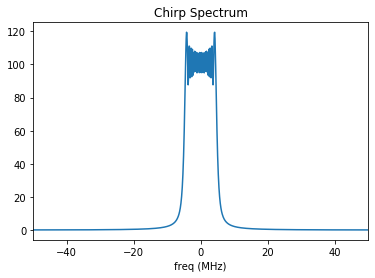

In [3]:
sfft = np.fft.fftshift(np.fft.fft(s));
f = n*(fs/N);
plt.figure;
plt.plot(f/1e6,np.abs(sfft));
plt.xlabel("freq (MHz)"); plt.title('Chirp Spectrum');
plt.autoscale(enable=True, axis='x', tight=True);

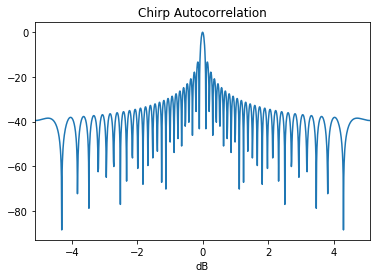

In [5]:
dfft = sfft * np.conj(sfft);
d = (1/N)*np.fft.fftshift(np.fft.ifft(dfft))
plt.figure;
plt.plot(t*1e6,20*np.log10(np.abs(d)));
plt.xlabel("time (us)"); plt.xlabel("dB"); plt.title('Chirp Autocorrelation');
plt.autoscale(enable=True, axis='x', tight=True);